In [1]:
import pandas as pd
file_path = "data/MPDataset_MPDS2024a.csv"
df = pd.read_csv(file_path)

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_48152/53203908.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [2]:
# Display the first few rows of the DataFrame
df.head()

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
0,11,Sweden,0,0,17/09/1944,194409,11220,Communist Party of Sweden,SKP,20,...,NaN,NaN,NaN,9.60,1.9,1.900,0.0,1.900,2024a,JN1LZH
1,11,Sweden,0,0,17/09/1944,194409,11320,Social Democratic Labour Party,SAP,30,...,NaN,NaN,NaN,-37.80,3.3,2.200,33.4,5.600,2024a,CMR7F6
2,11,Sweden,0,0,17/09/1944,194409,11420,People’s Party,FP,40,...,NaN,NaN,NaN,9.50,3.2,6.400,14.3,1.600,2024a,Z6OL6C
3,11,Sweden,0,0,17/09/1944,194409,11620,Right Party,NaN,60,...,NaN,NaN,NaN,28.00,1.8,22.800,10.6,0.000,2024a,YMKVN2
4,11,Sweden,0,0,17/09/1944,194409,11810,Agrarian Party,NaN,80,...,NaN,NaN,NaN,23.81,0.0,19.048,0.0,4.762,2024a,U4SCRD


#### Crear campo 'agno' para registrar el año del programa de gobierno

In [3]:
# Insert column 'agno' into the dataframe, of type int, to the right of column 'date'
df.insert(df.columns.get_loc('date') + 1, 'agno', df['edate'].str[-4:].astype(int))

# List unique values of new column 'agno'
unique_agno_values = df['agno'].unique()
print(unique_agno_values)

[1944 1948 1952 1956 1958 1960 1964 1968 1970 1973 1976 1979 1982 1985
 1988 1991 1994 1998 2002 2006 2010 2014 2018 2022 1945 1949 1953 1957
 1961 1965 1969 1977 1981 1989 1993 1997 2001 2005 2009 2013 2017 1947
 1950 1966 1971 1975 1984 1987 1990 2007 2011 2015 2019 1951 1954 1962
 1972 1983 1995 1999 2003 1946 1959 1963 1967 1974 1978 2016 2021 1986
 2012 2004 1992 1996 2008 2000 1980 1955 1921 1925 1929 1933 1938 2020
 1920 1924 1928 1932 1936 1940 2023]


In [4]:
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
df_AD.head()


,Dominio,Nombre_Dominio,Variable_per,Detalle_Dominio
0,Domain_1,External Relations,per101,Foreign Special Relationships: Positive
1,Domain_1,External Relations,per102,Foreign Special Relationships: Negative
2,Domain_1,External Relations,per103,Anti-Imperialism
3,Domain_1,External Relations,per104,Military: Positive
4,Domain_1,External Relations,per105,Military: Negative


In [34]:
# Create a list of column names that begin with 'per' and have a digit in position 4
per_columns = ['countryname', 'candidatename', 'agno', 'presvote'] + [col for col in df.columns if col.startswith('per') and col[3].isdigit()]
#per_columns

#### en 'df' filtramos registros de Chile, separamos por año de elección y calculamos valores representativos basados en el promedio ponderado por el % obtenido en la elección presidencial (presvote)

In [40]:
# Filter df by 'countryname' == 'Chile'
df_Chile = df[df['countryname'] == 'Chile']

df_Chile = df_Chile.sort_values(by='agno')

# Create a list of column names that begin with 'per' and have a digit in position 4
per_columns_4digit = [col for col in df.columns if col.startswith('per') and col[3].isdigit()]

# Group by column 'agno' and calculate the weighted average of each column in 'per_columns_4digit' using column 'presvote' as weights
df_Chile_ponderado = df_Chile.groupby('agno').apply(
    lambda x: pd.Series({col: np.average(x[col], weights=x['presvote']) for col in per_columns_4digit})
).reset_index()

# Display the results
df_Chile_ponderado

,agno,per101,per102,per103,per104,per105,per106,per107,per108,per109,...,per606_1,per606_2,per607_1,per607_2,per607_3,per608_1,per608_2,per608_3,per703_1,per703_2
0,1989,0.367161,0.049098,0.204681,2.241851,0.898452,0.567973,4.764237,0.913344,0.420679,...,0.981203,0.273091,0.340951,0.000000,0.136270,0.000000,0.000000,0.000000,1.538705,0.000000
1,1993,0.289693,0.037331,0.000000,1.127951,0.206192,0.209040,3.254579,0.721319,0.037331,...,1.866414,0.137227,0.000000,0.068965,0.034483,0.000000,0.000000,0.000000,2.902561,0.000000
2,1999,0.056430,0.126620,0.000000,2.584547,0.393984,0.112347,1.348291,0.351827,0.000000,...,1.588358,0.000000,0.449626,0.000000,1.152555,0.000000,0.000000,0.000000,2.163017,0.000000
3,2005,0.501296,0.000000,0.108972,1.237788,0.586723,0.361019,2.251643,0.646983,0.425330,...,1.451055,0.567666,0.134203,0.033551,1.563993,0.000000,0.000000,0.000000,0.783858,0.000000
4,2009,0.005651,0.000000,0.174377,0.897141,0.376400,0.029600,1.546047,0.789124,0.050161,...,0.631070,0.000000,0.000000,0.022030,2.946260,0.000000,0.000000,0.000000,2.101008,0.000000
5,2013,0.207215,0.000000,0.000000,0.966870,0.330345,0.055490,0.421749,1.206564,0.022495,...,0.389431,0.000000,0.016884,0.000000,2.622056,0.000000,0.000000,0.000000,1.865988,0.000000
6,2017,0.120377,0.007759,0.032650,0.457728,0.192404,0.146080,0.654128,0.359964,0.101033,...,4.289776,0.248078,0.966183,0.072217,0.835250,0.000000,0.077258,0.007098,0.878473,0.000000
7,2021,0.038239,0.015586,0.059179,0.688266,0.217654,0.086899,0.766963,0.170824,0.320040,...,0.989899,0.198364,0.400399,0.017372,0.882890,0.020617,0.005839,0.043345,1.705175,0.014016


#### Aspecto a analizar: INCLUSIÓN Y MINORÍAS (503, 705) 

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_48152/1471490455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_inclymin['Total'] = df_Chile_inclymin['per503'] + df_Chile_inclymin['per705']


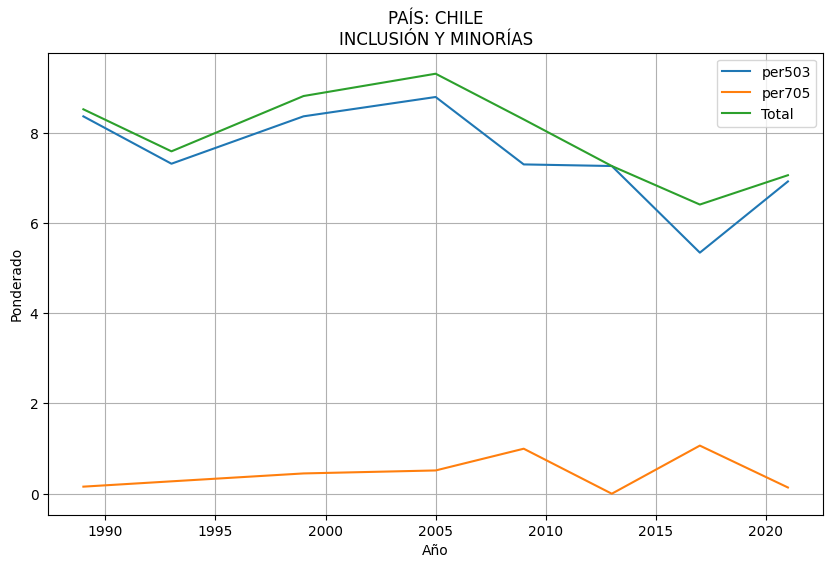

In [38]:
# Create dataframe 'df_Chile_inclymin' from 'df_Chile_ponderado' with columns 'agno', 'per503', 'per705'
df_Chile_inclymin = df_Chile_ponderado[['agno', 'per503', 'per705']]

# Add a new column 'Total' with the sum of columns 'per503' and 'per705'
df_Chile_inclymin['Total'] = df_Chile_inclymin['per503'] + df_Chile_inclymin['per705']

# Plot columns per503, per705, Total with agno in the horizontal axis
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin['per503'], label='per503')
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin['per705'], label='per705')
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin['Total'], label='Total')

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title('PAÍS: CHILE\nINCLUSIÓN Y MINORÍAS')
plt.legend()
plt.grid(True)
plt.show()

### *** MODIFICAR CÓDIGO PARA USAR PRESVOTE O PERVOTE SEGÚN SEA EL CASO

#### Alemania

In [ ]:
df_Alemania = df[df['countryname'] == 'Germany']

df_Alemania = df_Alemania.sort_values(by='agno')

# Create a list of column names that begin with 'per' and have a digit in position 4
per_columns_4digit = [col for col in df.columns if col.startswith('per') and col[3].isdigit()]

# Group by column 'agno' and calculate the weighted average of each column in 'per_columns_4digit' using column 'presvote' as weights
df_Alemania_ponderado = df_Alemania.groupby('agno').apply(
    lambda x: pd.Series({col: np.average(x[col], weights=x['pervote']) for col in per_columns_4digit})
).reset_index()

# Display the results
df_Alemania_ponderado

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_48152/3453244782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Alemania_inclymin['Total'] = df_Alemania_inclymin['per503'] + df_Alemania_inclymin['per705']


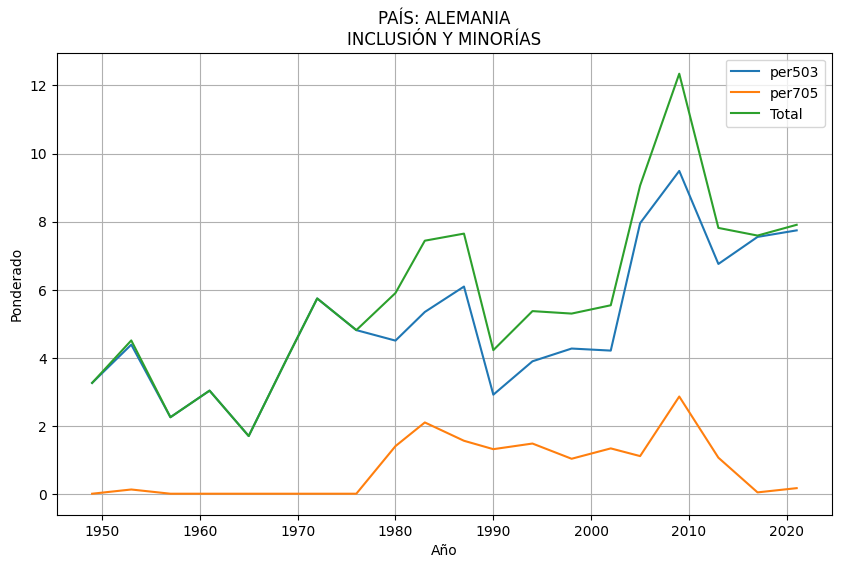

In [51]:
# Create dataframe
df_Alemania_inclymin = df_Alemania_ponderado[['agno', 'per503', 'per705']]

# Add a new column 'Total' with the sum of columns 'per503' and 'per705'
df_Alemania_inclymin['Total'] = df_Alemania_inclymin['per503'] + df_Alemania_inclymin['per705']

# Plot columns per503, per705, Total with agno in the horizontal axis
plt.figure(figsize=(10, 6))
plt.plot(df_Alemania_inclymin['agno'], df_Alemania_inclymin['per503'], label='per503')
plt.plot(df_Alemania_inclymin['agno'], df_Alemania_inclymin['per705'], label='per705')
plt.plot(df_Alemania_inclymin['agno'], df_Alemania_inclymin['Total'], label='Total')

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title('PAÍS: ALEMANIA\nINCLUSIÓN Y MINORÍAS')
plt.legend()
plt.grid(True)
plt.show()

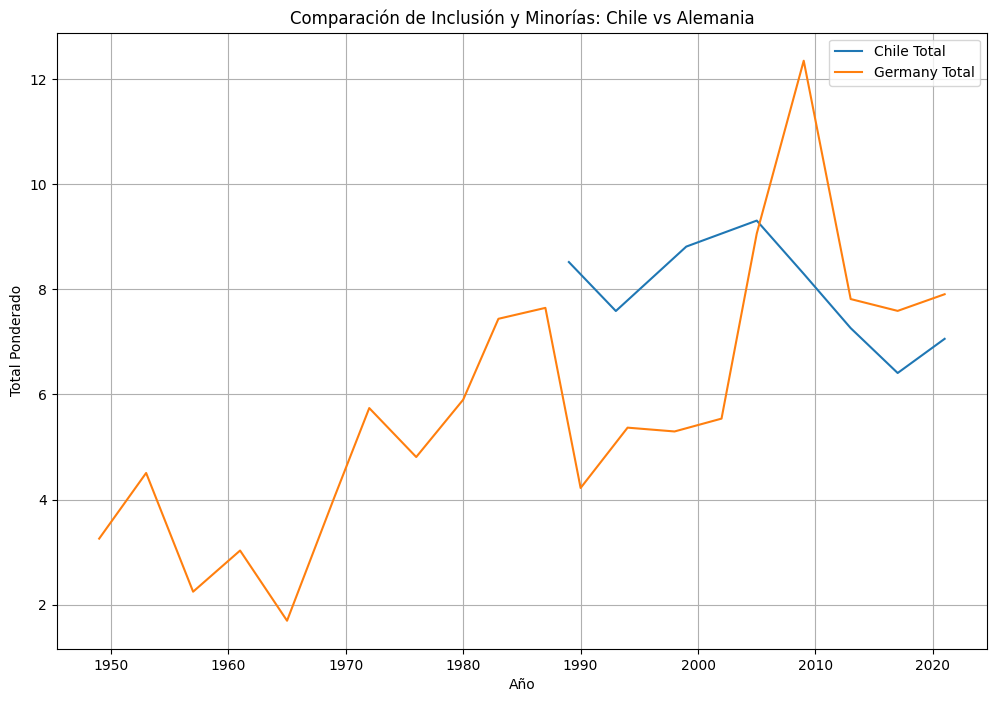

In [52]:
plt.figure(figsize=(12, 8))

# Plot 'Total' for Chile
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin['Total'], label='Chile Total')

# Plot 'Total' for Germany
plt.plot(df_Alemania_inclymin['agno'], df_Alemania_inclymin['Total'], label='Germany Total')

plt.xlabel('Año')
plt.ylabel('Total Ponderado')
plt.title('Comparación de Inclusión y Minorías: Chile vs Alemania')
plt.legend()
plt.grid(True)
plt.show()